# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
from decouple import config
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/ethereum/?convert=CAD"

In [5]:
#headers = {'x-rapidapi-host': 'l4chsalter-alternative-me-crypto-v1.p.rapidapi.com'}
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

# Compute current value of my crpto

my_btc_value = btc_response_data['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = eth_response_data['data']['1027']['quotes']['USD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $55182.00
The current value of your 5.3 ETH is $16577.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
current_date = date.today()
today = pd.Timestamp(current_date, tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio_current = alpaca.get_barset(
    tickers,
    timeframe,
    start= today,
    end= today

).df

# Preview DataFrame
df_portfolio_current

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-08-09 00:00:00-04:00  115.89  115.96  115.58  115.59  5003990  442.45   

                                                              
                              high     low   close    volume  
time                                                          
2021-08-09 00:00:00-04:00  442.795  441.31  442.14  32740524

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio_current['AGG']['close'].item()
spy_close_price = df_portfolio_current['SPY']['close'].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.59
Current SPY closing price: $442.14


In [10]:
# Compute the current value of shares
my_spy_value = df_portfolio_current['SPY']['close'].item() * my_spy
my_agg_value = df_portfolio_current['AGG']['close'].item() * my_agg


# Print current value of share


print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22107.00
The current value of your 200 AGG shares is $23118.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
sum_shares = my_spy_value + my_agg_value
sum_crypto = my_btc_value + my_eth_value



df_savings = pd.DataFrame([sum_shares,sum_crypto],
                         index=['shares', 'crypto'],
                         columns=['amount'])

# Display savings DataFrame
display(df_savings)

,amount
shares,45225.000
crypto,71759.764


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

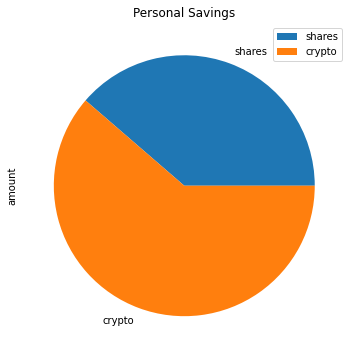

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',figsize=(10, 6), title='Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()
total_savings.item()

116984.764

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()

# Validate saving health
if total_savings.item() > emergency_fund:
    print('Congrats, you have enongh money for this fund.')
elif total_savings.item() == emergency_fund:
    print('Congrats, you have reach you emergency saving goal')
else:
    emergency_fund_bal == emergency_fund - total_savings.item()
    print(f'You need ${emergency_fund_bal} to reach your goal.') 

Congrats, you have enongh money for this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-08', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-08', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe = '1D',
    start= start_date,
    end= end_date

).df

# Display sample data
df_stock_data.count()

AGG  open      100
     high      100
     low       100
     close     100
     volume    100
SPY  open      100
     high      100
     low       100
     close     100
     volume    100
dtype: int64

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_Thirty_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-03-17 00:00:00-04:00  113.55  113.9778  113.4800  113.87  5023810   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.2000  113.42  6077516   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.3300  113.50  4674852   
2021-03-22 00:00:00-04:00  113.70  113.8000  113.6022  113.75  5321817   
2021-03-23 00:00:00-04:00  113.89  114.0400  113.7700  114.04  5026028   

                                            SPY                           \
                          daily_return     open     high     low   close   
time                                                                       
2021-03-17 00:00:00-04:00          NaN  394.530  398.120  393.30  397.22   
2021-03-18 00:00:00-04:00    -0.003952  394.475  396.720  390.75  391.41   
2021-03-19 00:00:00-04:00     0.000705  389.880  391.569  387.15  389.50   
2021-03-22 00:00:00-04:00     0.002203  390.030  394.070  389.97  392.54   
2021-03-23 00:00:00-04:00     0.002549  391.910  393.460  388.66  389.59   

                                                  
                             volume daily_return  
time                                              
2021-03-17 00:00:00-04:00  61876016          NaN  
2021-03-18 00:00:00-04:00  98794050    -0.014627  
2021-03-19 00:00:00-04:00  93819590    -0.004880  
2021-03-22 00:00:00-04:00  61372559     0.007805  
2021-03-23 00:00:00-04:00  78235945    -0.007515

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997480,0.999789,1.004831,1.003764,1.002507,0.996872,1.001968,0.998335,1.001764,1.006470,...,0.996478,1.007010,0.999541,1.006837,0.999265,0.999959,0.992975,1.005223,1.006236,1.005237
2,0.989361,1.003693,1.001474,1.005980,0.991156,1.006519,1.003014,0.996193,1.005424,1.006989,...,1.002546,1.008218,0.989413,1.004537,1.004883,1.000425,0.993901,1.007992,1.002314,1.016382
3,0.988223,0.995340,1.005066,1.003682,0.994884,0.995109,1.006783,0.990043,0.997114,1.008558,...,1.003662,1.012335,0.988849,1.007825,1.007184,1.009392,0.999286,1.005753,0.996515,1.015512
4,0.985569,1.003250,1.010328,1.011364,0.996206,0.990515,1.006083,0.999235,0.999005,1.004749,...,1.009727,1.025369,0.979820,1.004256,1.013323,1.004525,1.001246,1.005117,0.993357,1.016743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,185.347148,176.732307,186.663441,221.917433,333.728887,332.653445,232.285044,175.673851,228.176176,307.160891,...,286.307476,355.626199,310.900073,192.175268,157.611982,392.715108,283.226255,222.212267,545.518779,251.840653
7557,185.939859,176.808427,184.789964,223.389547,332.837263,332.264860,232.488265,174.303869,227.007189,308.729646,...,287.247316,354.004583,310.129489,192.232314,157.111419,394.441188,282.311471,221.628908,545.932805,251.155308
7558,187.318330,176.283231,184.170649,222.684169,334.026299,332.540258,233.159555,173.909199,227.673611,309.074468,...,286.535264,355.861857,309.366583,192.446507,156.880911,393.301090,284.342135,222.031073,544.843755,250.356305
7559,186.276987,176.165905,184.000976,222.901399,333.211892,333.242891,235.167691,173.844526,228.889849,309.318931,...,285.056103,354.479799,306.961159,192.296694,155.978653,393.803553,285.114647,222.941754,546.492305,251.728520


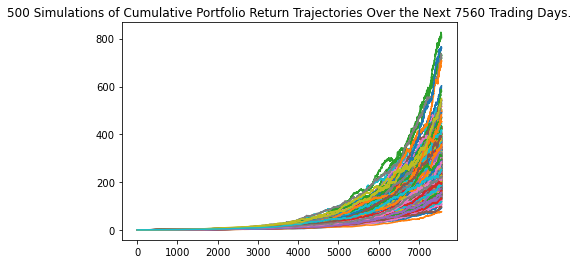

In [20]:
# Plot simulation outcomes
line_plot = MC_Thirty_year.plot_simulation()

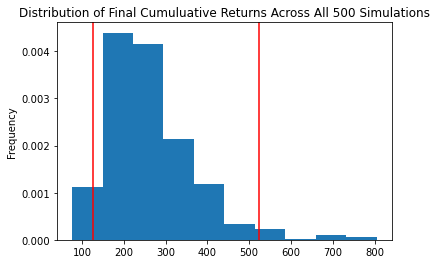

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Thirty_year.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_year_sim_stats = MC_Thirty_year.summarize_cumulative_return()

# Print summary statistics
print(thirty_year_sim_stats)

count           500.000000
mean            263.673553
std             106.475451
min              76.427408
25%             189.488269
50%             239.400351
75%             316.004565
max             804.478717
95% CI Lower    126.880940
95% CI Upper    522.683229
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_year_sim_stats[8]*initial_investment,2)
ci_upper = round(thirty_year_sim_stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $2537618.8 and $10453664.59


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_year_sim_stats[8]*initial_investment,2)
ci_upper = round(thirty_year_sim_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $3806428.2 and $15680496.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_Five_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-03-17 00:00:00-04:00  113.55  113.9778  113.4800  113.87  5023810   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.2000  113.42  6077516   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.3300  113.50  4674852   
2021-03-22 00:00:00-04:00  113.70  113.8000  113.6022  113.75  5321817   
2021-03-23 00:00:00-04:00  113.89  114.0400  113.7700  114.04  5026028   

                                            SPY                           \
                          daily_return     open     high     low   close   
time                                                                       
2021-03-17 00:00:00-04:00          NaN  394.530  398.120  393.30  397.22   
2021-03-18 00:00:00-04:00    -0.003952  394.475  396.720  390.75  391.41   
2021-03-19 00:00:00-04:00     0.000705  389.880  391.569  387.15  389.50   
2021-03-22 00:00:00-04:00     0.002203  390.030  394.070  389.97  392.54   
2021-03-23 00:00:00-04:00     0.002549  391.910  393.460  388.66  389.59   

                                                  
                             volume daily_return  
time                                              
2021-03-17 00:00:00-04:00  61876016          NaN  
2021-03-18 00:00:00-04:00  98794050    -0.014627  
2021-03-19 00:00:00-04:00  93819590    -0.004880  
2021-03-22 00:00:00-04:00  61372559     0.007805  
2021-03-23 00:00:00-04:00  78235945    -0.007515

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000812,0.995697,1.003418,1.002782,1.008377,0.998263,0.998670,1.002377,0.999942,1.001950,...,1.001237,1.001182,1.010002,1.000241,0.994436,1.007241,1.002232,1.004857,0.997229,0.988065
2,0.999049,1.000788,1.002529,0.993465,1.011597,0.993618,0.995914,1.002856,1.002399,1.005867,...,0.998778,1.001589,1.010799,0.999418,0.998369,1.017324,1.011347,0.998179,0.996815,0.988042
3,1.005103,1.001489,1.009656,0.993311,1.012439,0.999253,0.993349,1.005520,1.007841,1.008231,...,0.998259,1.003305,1.014659,1.000970,1.002787,1.015066,1.018038,1.002024,1.004380,0.983475
4,1.005419,1.004968,1.008586,0.986541,1.021958,1.003098,0.999715,1.005900,1.003663,1.001323,...,0.990816,1.014936,1.019351,1.005507,0.997681,1.011965,1.017025,0.995080,1.003905,0.989707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.205701,2.847282,5.538172,4.284855,3.255478,2.467043,2.268502,3.065827,2.720811,4.321360,...,3.111468,3.261216,2.802259,3.082394,2.044987,3.547375,4.570266,3.931350,2.944478,2.413940
1257,2.196089,2.817877,5.565271,4.317034,3.227820,2.458283,2.262812,3.059591,2.743396,4.327319,...,3.118570,3.300692,2.805490,3.082256,2.050307,3.568182,4.573558,3.909750,2.923171,2.399561
1258,2.193587,2.813972,5.562270,4.299771,3.260618,2.474271,2.280703,3.059126,2.744645,4.314777,...,3.129325,3.337149,2.803158,3.133382,2.034619,3.576452,4.561566,3.915530,2.894107,2.424846
1259,2.172065,2.838648,5.584757,4.287617,3.266269,2.466894,2.275459,3.074779,2.733869,4.360743,...,3.135967,3.360682,2.794278,3.149739,2.050261,3.611608,4.565927,3.891344,2.899964,2.404003


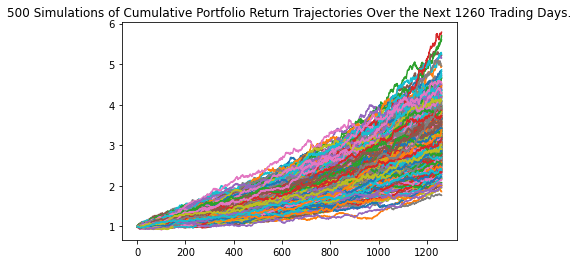

In [27]:
# Plot simulation outcomes
line_plot = MC_Five_year.plot_simulation()

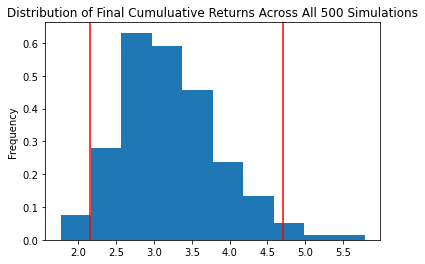

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Five_year.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_sim_stats = MC_Five_year.summarize_cumulative_return()

# Print summary statistics
print(five_year_sim_stats)

count           500.000000
mean              3.219916
std               0.654811
min               1.765627
25%               2.742230
50%               3.155656
75%               3.644747
max               5.786989
95% CI Lower      2.149864
95% CI Upper      4.698535
Name: 1260, dtype: float64


In [30]:
## Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_year_sim_stats[8]*initial_investment,2)
ci_upper_five = round(five_year_sim_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $128991.86 and $281912.1


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75,.25],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_Ten_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-03-17 00:00:00-04:00  113.55  113.9778  113.4800  113.87  5023810   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.2000  113.42  6077516   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.3300  113.50  4674852   
2021-03-22 00:00:00-04:00  113.70  113.8000  113.6022  113.75  5321817   
2021-03-23 00:00:00-04:00  113.89  114.0400  113.7700  114.04  5026028   

                                            SPY                           \
                          daily_return     open     high     low   close   
time                                                                       
2021-03-17 00:00:00-04:00          NaN  394.530  398.120  393.30  397.22   
2021-03-18 00:00:00-04:00    -0.003952  394.475  396.720  390.75  391.41   
2021-03-19 00:00:00-04:00     0.000705  389.880  391.569  387.15  389.50   
2021-03-22 00:00:00-04:00     0.002203  390.030  394.070  389.97  392.54   
2021-03-23 00:00:00-04:00     0.002549  391.910  393.460  388.66  389.59   

                                                  
                             volume daily_return  
time                                              
2021-03-17 00:00:00-04:00  61876016          NaN  
2021-03-18 00:00:00-04:00  98794050    -0.014627  
2021-03-19 00:00:00-04:00  93819590    -0.004880  
2021-03-22 00:00:00-04:00  61372559     0.007805  
2021-03-23 00:00:00-04:00  78235945    -0.007515

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998619,1.001580,1.003130,1.000134,0.998122,0.994100,0.999912,1.002723,1.001052,1.001418,...,0.999819,1.000331,0.998339,1.000596,1.004120,1.000844,0.999979,0.998388,0.998206,1.006123
2,0.997127,1.002363,1.002986,1.003551,1.001040,0.995031,0.998705,1.003124,1.000330,1.004471,...,0.997798,0.997730,0.999183,1.000745,1.008271,1.003895,0.997215,0.996097,0.999558,1.005406
3,0.998215,1.004132,1.004187,1.001462,0.998009,0.997326,1.003481,1.004165,1.001621,1.005429,...,1.000845,1.005667,1.001050,1.005640,1.007590,1.005838,0.993427,0.998078,0.999788,1.003339
4,0.999013,1.007557,1.007284,1.001769,1.001656,1.000140,1.005602,1.004151,0.997434,1.005365,...,1.004713,1.008621,1.001066,0.999579,1.007891,1.004184,0.992071,0.997836,0.997942,1.004832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.661769,2.722205,2.582328,2.960873,2.467246,3.485415,2.696085,2.916683,2.478937,2.972907,...,2.987969,2.815894,2.618458,2.894441,2.354112,2.919773,2.716374,2.605014,2.780423,2.758049
2517,2.667873,2.724216,2.584804,2.964810,2.463775,3.504904,2.687335,2.917226,2.484942,2.968870,...,2.993784,2.821863,2.617009,2.893664,2.354935,2.924079,2.723648,2.593334,2.783296,2.760870
2518,2.675049,2.725246,2.580429,2.961222,2.471362,3.515884,2.693982,2.909391,2.494595,2.967816,...,2.994669,2.834240,2.617892,2.892610,2.345624,2.941481,2.725417,2.599261,2.767725,2.768111
2519,2.672184,2.714194,2.572058,2.970914,2.469894,3.501964,2.688746,2.911880,2.497661,2.971571,...,2.987536,2.825422,2.624193,2.899581,2.346857,2.934871,2.733061,2.606694,2.768819,2.767102


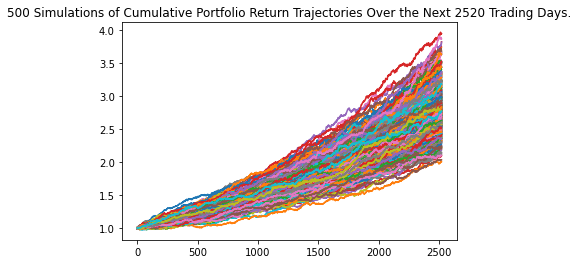

In [33]:
# Plot simulation outcomes
line_plot = MC_Ten_year.plot_simulation()

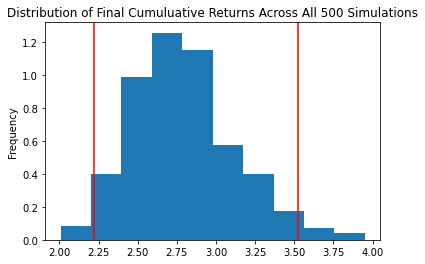

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Ten_year.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_sim_stats = MC_Ten_year.summarize_cumulative_return()

# Print summary statistics
print(ten_year_sim_stats)

count           500.000000
mean              2.792119
std               0.330450
min               2.006593
25%               2.559297
50%               2.762148
75%               2.971529
max               3.951279
95% CI Lower      2.220596
95% CI Upper      3.524077
Name: 2520, dtype: float64


In [36]:
# Set initial investment
ci_lower_ten = round(ten_year_sim_stats[8]*initial_investment,2)
ci_upper_ten = round(ten_year_sim_stats[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $133235.76 and $211444.63
